# Projectile Motion using Regression Network

- Follow the week 2 lecture slides

In [1]:
#!/usr/bin/env python
# coding: utf-8

# First we import all the basic things we need.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets set up to put all output plots in one output PDF

outputname = 'projectile_regression_week1.pdf'

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages(outputname)

## Input File

- For this notebook we will use,
  - Training file: ```projectile_input_200.txt```
  - Testing file: ```projectile_input_test_10.txt``` 
- input file has tof,height,distance,velocity,angleDegrees

- from this, we decide to read in  tof,height,distance,velocity

## Read the Input file in a Pandas DataFrame

In [3]:
# First we prepare the dataframe in which we get the data
col_names = ['tof','height','distance','velocity','angleDegrees']
cols = [0,1,2,3]
# Now here I purposely dropped the last column (read in only first 4)


In [4]:
projdf = pd.read_csv('input/projectile_input_200.txt',sep=' ',index_col=None,usecols=cols,names=col_names)

In [5]:
projdf.head()

,tof,height,distance,velocity
0,1.90610,8.90143,16.1042,12.5943
1,1.50155,5.52391,13.9021,11.8260
2,1.67037,6.83587,14.9818,12.1423
3,1.85260,8.40870,27.0152,17.1770
4,1.62643,6.48093,11.9861,10.8547


## Visualize the Inputs

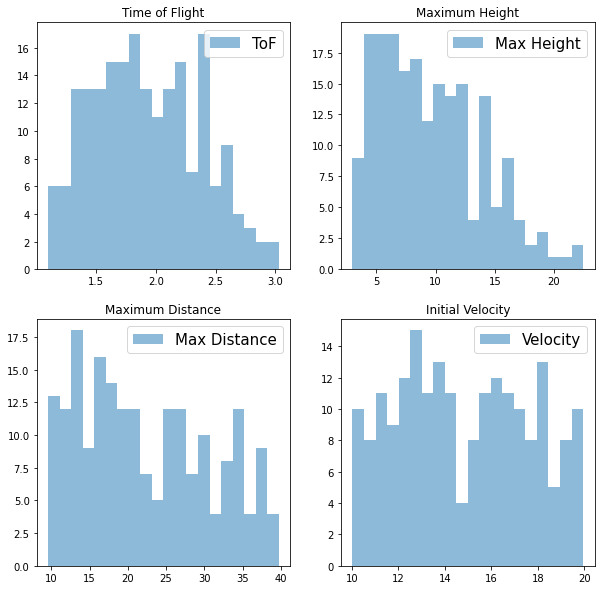

In [6]:
#Let us visualize the input by plotting some quantities
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.flatten()

##Set the legend size
plt.rcParams['legend.fontsize']=15

ax[0].hist(projdf['tof'], bins=20, lw=2, alpha=0.5,label='ToF')
ax[0].set_title('Time of Flight')
ax[0].legend(loc='upper right')

ax[1].hist(projdf['height'], bins=20, lw=2, alpha=0.5,label='Max Height')
ax[1].set_title('Maximum Height')
ax[1].legend(loc='upper right')

ax[2].hist(projdf['distance'], bins=20, lw=2, alpha=0.5,label='Max Distance')
ax[2].set_title('Maximum Distance')
ax[2].legend(loc='upper right')

ax[3].hist(projdf['velocity'], bins=20, lw=3, alpha=0.5,label='Velocity')
ax[3].set_title('Initial Velocity')
ax[3].legend(loc='upper right')
plt.savefig(pp,format='pdf')

## Prepare the data for training

In [7]:
# Split the label column as y, and the input variables as X
X, y = projdf.values[:,:-1], projdf.values[:,-1]

print(f'Shapes of data, X, y are {projdf.shape}, {X.shape} , {y.shape}')


n_features = X.shape[1]
print(f'The number of input variables is {n_features}')


Shapes of data, X, y are (200, 4), (200, 3) , (200,)
The number of input variables is 3


## Build a neural network model

-  Now we declare a neural network with <mark>2 hidden layers</mark>
- first hidden layer has **4 neurons**, and takes **n_features** number of inputs 
- second hidden layer has **2 neurons**
-  output layer has **1 neuron**
-  We have initialized weights using option **'he_normal'** and
-  we are using the **ReLU activation function** for all neurons.


In [8]:
model = Sequential()
model.add(Dense(4, activation='relu', kernel_initializer='he_normal', input_dim=n_features))
model.add(Dense(2, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='relu'))


### Compile the model

In [9]:
#compile the model, by choosing a learning rate and a loss function
model.compile(optimizer='adam', loss='MeanSquaredError')


### Train the model

In [10]:
# Now we train the model
history = model.fit(X,y,epochs=10,batch_size=10,verbose=1)
print(history.history.keys())

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 157.9231
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 116.7802
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 81.8302
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 55.1046
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 35.4499
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 22.0640
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 14.0355
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 9.9067
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 8.0537
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 7.3811
dict_keys(['loss'])


### Model summary and save the model

In [11]:
#Now we print the model summary to screen and save the trained model to a file
modelname = 'my_model.h5'

print('The NN architecture is')
model.summary()
model.save(modelname)


The NN architecture is
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### Visualize the Training Process

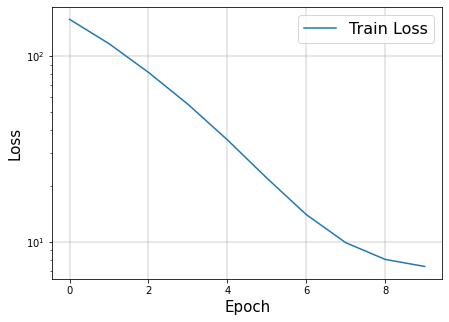

In [12]:
fig,ax = plt.subplots(figsize=(7,5))

ax.plot(history.history['loss'], label='Train Loss')
ax.set_xlabel('Epoch',fontsize=15)
ax.set_ylabel('Loss',fontsize=15)
#plt.ylim([0.001, 10])
ax.set_yscale('log')
ax.legend(loc='upper right',fontsize=16)
ax.grid('--',alpha=0.3, lw=2)

plt.savefig(pp,format='pdf')

# Evaluating the model

We have trained a model which can predict **velocity** based on three inputs,
- time of flight
- maximum height
- maximum distance

Now let's test how well it performs! 

In [13]:
# Now we evaluate the model using our test file.
# Let us begin by reading in the test file, and separating out the first three variables and the output

projdf_test = pd.read_csv('projectile_input_test_10.txt',sep=' ',index_col=None,usecols=cols,names=col_names)


### Prepare the data with a same structure as of training

In [14]:
# Then separate the variables and the result columns
X_test, y_true = projdf_test.values[:,:-1], projdf_test.values[:,-1]

### Predict

In [15]:
# Make the prediction
pred_y = model.predict(X_test)

### Figure of Merit and Conclusion

In [16]:
#At this point,  y_true has the true answers  and pred_y  has the predicted answers


# Arrange them back in a nice dataframe

results = pd.DataFrame()
results['y_true'] = y_true
results['y_pred'] = pred_y

In [17]:
# Let us calculate a quick figure of merit for our sake
results['diffsquare'] = results.apply(lambda row: np.square(row.y_true-row.y_pred) , axis=1 )

#Now let us print the dataframe
print(results)

    y_true     y_pred  diffsquare
0  19.2770  20.612761    1.784256
1  10.2068   5.932223   18.272010
2  13.4036  10.573713    8.008259
3  16.9928  17.985783    0.986014
4  18.9150  19.782173    0.751989
5  16.3164  15.535463    0.609862
6  17.0892  17.622656    0.284575
7  17.7760  18.549318    0.598021
8  17.8712  18.283707    0.170162
9  12.1943   9.337968    8.158633


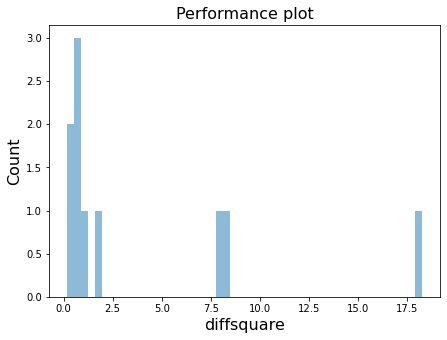

In [18]:
fig,ax = plt.subplots(figsize=(7,5))

ax.hist(results.diffsquare, bins=50,lw=3,log=False,alpha=0.5)
ax.set_xlabel('diffsquare',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title('Performance plot',fontsize=16)
plt.savefig(pp,format='pdf')
plt.show()

In [19]:
TotalDiff = results['diffsquare'].sum()/results.shape[0]
print(f"The total difference between expectation and prediction is {TotalDiff:.4f}")


The total difference between expectation and prediction is 3.9624


In [20]:
# Now we close the output file
pp.close()